In [31]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='skimage')

In [32]:
# 更改根目录
import os
os.chdir('/kaggle/input/intel-image-classification')
os.getcwd()

'/kaggle/input/intel-image-classification'

In [33]:
# 训练集和测试集路径
train_dir='seg_train/seg_train/'
test_dir='seg_test/seg_test/'

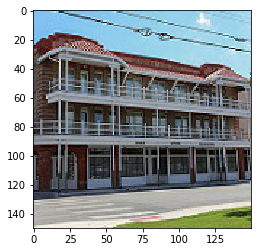

In [34]:
import sys
from tqdm import tqdm
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.image as img
import numpy as np
from skimage import color
from skimage.transform import resize
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
import tensorflow as tf
%matplotlib inline
img_path='buildings/1001.jpg'
image=img.imread(os.path.join(train_dir, img_path))
plt.imshow(image)
plt.show()

In [35]:
# 读数据
train_X, train_Y = [], []     # train_X(训练集数据集X)，train_Y(训练集目标值Y);
IMG_HEIGHT = IMG_WIDTH = 100  # 图像尺寸为IMG_HEIGHT，IMG_WIDTH

# 建立生成器取得批量数据
sys.stdout.flush()
train_folders = next(os.walk(train_dir))[1]

print('开始读取训练集图像文件...')
for folder in train_folders:
    PATH = os.path.join(train_dir, folder)
    train_imgs = os.listdir(PATH)
    print('读取文件夹' + folder)
    for n, id_ in tqdm(enumerate(train_imgs), total = len(train_imgs)):
        train_img_path=os.path.join(PATH, id_)
        I=img.imread(train_img_path)
        # 图像裁剪
        cropped_img= resize(I, (IMG_HEIGHT, IMG_WIDTH), mode='constant', preserve_range=True)
        train_X.append(cropped_img)
        train_Y.append(folder)
    print('文件夹'+folder+'读取完成!\n')
print('训练集图像文件读取完成!!!\n')


  1%|          | 28/2512 [00:00<00:08, 279.69it/s]

开始读取训练集图像文件...
读取文件夹mountain


  1%|          | 27/2382 [00:00<00:08, 268.66it/s]

文件夹mountain读取完成!

读取文件夹street


  1%|          | 28/2404 [00:00<00:08, 277.37it/s]

文件夹street读取完成!

读取文件夹glacier


  1%|          | 27/2191 [00:00<00:08, 265.84it/s]

文件夹glacier读取完成!

读取文件夹buildings


  1%|          | 28/2274 [00:00<00:08, 278.52it/s]

文件夹buildings读取完成!

读取文件夹sea


  1%|          | 26/2271 [00:00<00:08, 259.11it/s]

文件夹sea读取完成!

读取文件夹forest


100%|██████████| 2271/2271 [00:08<00:00, 256.65it/s]

文件夹forest读取完成!

训练集图像文件读取完成!!!



In [36]:
# 打乱数据
train_X, train_Y = shuffle(train_X, train_Y)

In [37]:
# 独热编码转换
map_dic={'buildings':[1,0,0,0,0,0],'forest':[0,1,0,0,0,0],\
        'glacier':[0,0,1,0,0,0],'mountain':[0,0,0,1,0,0],\
        'sea':[0,0,0,0,1,0],'street':[0,0,0,0,0,1]}

train_Y = np.array([map_dic[e] for e in train_Y])
train_X = np.array(train_X)

In [43]:
import numpy as np
import pandas as pd
import os
import numpy
import glob
import cv2
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.models import Sequential
from keras.layers import Flatten, Dense
weights = 'vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
# weights = 'vgg19/vgg19_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [44]:
model = Sequential()
# model.add(VGG16(include_top = False, weights = weights, input_shape = (150,150,3)))
model.add(VGG19(include_top = False, input_shape = (100,100,3)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(6, activation = 'softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='adagrad',
              metrics=['accuracy'])
# 优化器选项 rmsprop adagrad sgd
model.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               2359808   
_________________________________________________________________
dense_10 (Dense)             (None, 6)                 3078      
Total params: 22,387,270
Trainable params: 22,387,270
Non-trainable params: 0
_________________________________________________________________


In [ ]:
Fit = model.fit(train_X, train_Y, epochs = 20, validation_split = 0.30)

Train on 9823 samples, validate on 4211 samples
Epoch 1/20
9823/9823 [==============================] - 28s 3ms/step - loss: 1380366001817.3748 - accuracy: 0.3775 - val_loss: 1.1904 - val_accuracy: 0.4956
Epoch 2/20
9823/9823 [==============================] - 28s 3ms/step - loss: 1.1083 - accuracy: 0.5362 - val_loss: 1.0506 - val_accuracy: 0.5742
Epoch 3/20
9823/9823 [==============================] - 28s 3ms/step - loss: 0.9649 - accuracy: 0.6168 - val_loss: 0.8796 - val_accuracy: 0.6649
Epoch 4/20
9823/9823 [==============================] - 28s 3ms/step - loss: 0.8616 - accuracy: 0.6688 - val_loss: 0.8286 - val_accuracy: 0.6956
Epoch 5/20
9823/9823 [==============================] - 28s 3ms/step - loss: 0.8019 - accuracy: 0.7011 - val_loss: 0.8018 - val_accuracy: 0.7093
Epoch 6/20
9823/9823 [==============================] - 28s 3ms/step - loss: 0.7591 - accuracy: 0.7220 - val_loss: 0.7391 - val_accuracy: 0.7357
Epoch 7/20
9823/9823 [==============================] - 28s 3ms/step -